<img src="fireblaze.jpg" width=250 height=200 />

* The decision tree is a technique for supervised learning that is applied both to classification problems and regression problems

In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Social_Network_Ads.csv')

In [35]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
df.shape

(400, 5)

In [37]:
#EDA

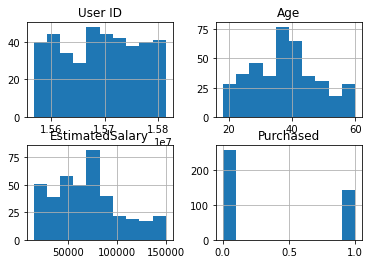

In [38]:
df.hist()
plt.show()

In [39]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [40]:
#splitting

X = df[['User ID','Age', 'EstimatedSalary']]
y = df['Purchased']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
X_train = sc.fit_transform(X_train)

In [46]:
X_test = sc.fit_transform(X_test)

In [47]:
X_train.shape

(300, 3)

In [48]:
X_test.shape

(100, 3)

In [49]:
y_train.shape

(300,)

In [50]:
# X_train = X_train.astype(float)
# X_test = X_test.astype(float)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [52]:
classifier = DecisionTreeClassifier(max_depth=3)

In [53]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, y_pred)

0.88

In [57]:
from sklearn.metrics import classification_report

In [58]:
print('classification_report:-\n', classification_report(y_test, y_pred))

classification_report:-
               precision    recall  f1-score   support

           0       1.00      0.81      0.89        63
           1       0.76      1.00      0.86        37

    accuracy                           0.88       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.91      0.88      0.88       100



1. print text representation of the tree with **sklearn.tree.export_text method**

2. plot with **sklearn.tree.plot_tree** method (matplotlib needed)



In [59]:
from matplotlib import pyplot as plt
from sklearn import tree

In [60]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.55
|   |   |--- feature_1 <= -0.07
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.07
|   |   |   |--- class: 0
|   |--- feature_2 >  0.55
|   |   |--- feature_2 <= 1.39
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.39
|   |   |   |--- class: 1
|--- feature_1 >  0.50
|   |--- feature_2 <= -0.88
|   |   |--- class: 1
|   |--- feature_2 >  -0.88
|   |   |--- feature_2 <= 0.38
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.38
|   |   |   |--- class: 1



In [61]:
# save it to the file, it can be done with following code:

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Plot Tree with plot_tree

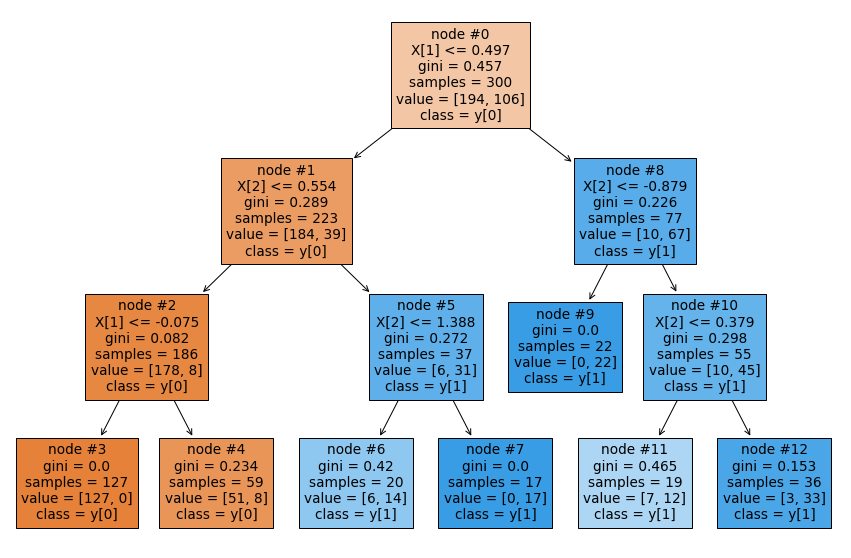

In [64]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()